In [5]:
%pylab inline
%config InlineBackend.figure_format ='retina'

import time

import anndata
import matplotlib.colors as mcolors
import pandas as pd



Populating the interactive namespace from numpy and matplotlib


In [6]:
Z_df = pd.read_csv('cao_linear_Z.csv', index_col=0)

In [7]:
W_df = pd.read_csv('cao_linear_W.csv', index_col=0)

In [8]:
W_df.head()

,gene_name,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,length,w0w1l
ENSMUSG00000098178.1,Gm42418,-0.370493,-0.234104,0.622348,-0.587298,-0.558491,0.512815,0.236952,-0.272706,0.266390,-0.440811,1.376586,0.438257
ENSMUSG00000064339.1,mt-Rnr2,-0.180532,-0.189003,0.536189,-0.587970,-0.507891,0.397798,0.232269,-0.172326,0.215428,-0.643161,1.288964,0.261370
ENSMUSG00000064337.1,mt-Rnr1,-0.257185,-0.235700,0.593896,-0.570087,-0.526330,0.451674,0.227710,-0.165990,0.237907,-0.599486,1.332603,0.348853
ENSMUSG00000060534.15,Dcc,-0.177856,-0.297961,-0.024785,0.501987,-0.487907,0.299524,-0.109603,-0.160086,-0.515255,-0.475185,1.108925,0.347007
ENSMUSG00000092341.2,Malat1,-0.092280,0.092773,0.060727,-0.153279,-0.210427,0.036895,0.145338,-0.469101,0.024399,-0.166671,0.599583,0.130853


In [238]:
text_shift = {
    (0, 'Cntn4'): (0.4, 0.4),
    (0, 'Col1a1'): (0., -0.5),
    (0, 'Olfr1062'): (0.3, -0.3),
    (0, 'Vmn2r-ps49'): (0.3, -0.2),
    (0, 'Hbb-bs'): (0.8, 0.4),
    (0, '1700019B21Rik'): (0.7, 0.),
    
    (1, 'Alb'): (0.7, 0.),
    (1, 'Vmn2r-ps49'): (0.5, -0.5),
    (1, 'Rfx4'): (0., 0.3),
    (1, 'Spon1'): (0., 0.2),
    (1, 'Srrm4'): (-0.8, 0.0),
    
    (2, 'Vmn2r-ps49'): (0.0, 0.4),
    (2, 'C130073E24Rik'): (1.0, 0.8),
    (2, 'Tbx15'): (0.4, -0.1),
    (2, 'Cped1'): (-0.4, -0.2),
    (2, 'Gm29478'): (0.0, 0.5),
    (2, 'Gm45455'): (0.0, 0.3),
    (2, 'March3'): (-0.1, 0.0),
    
    (3, 'Sirpb1b'): (-1.2, 0.4),
    (3, 'Dbx1'): (0.1, 0.4),
    (3, 'Adgrv1'): (0.0, -0.6),
    (3, 'Gm29478'): (0.2, 0.2),
    (3, 'Rfx4'): (-0.3, -0.3),
    (3, 'Gm3764'): (0.0, -0.2),
    (3, 'Rspo2'): (-0.3, 0.0),
    (3, 'Htr2c'): (0.6, 0.1),
    (3, 'Col1a1'): (0.0, 0.2),
    
    (4, 'Ttn'): (0.0, -0.4),
    (4, 'Sntb1'): (0.0, -0.3),
    (4, 'Colec12'): (-1.1, 0.1),
    (4, 'Adam12'): (0.1, 0.4),
    (4, 'Spon1'): (0.0, 0.2),
    (4, 'Gm3764'): (-0.2, 0.3),
    (4, 'C130071C03Rik'): (1.5, -0.35),
    
}

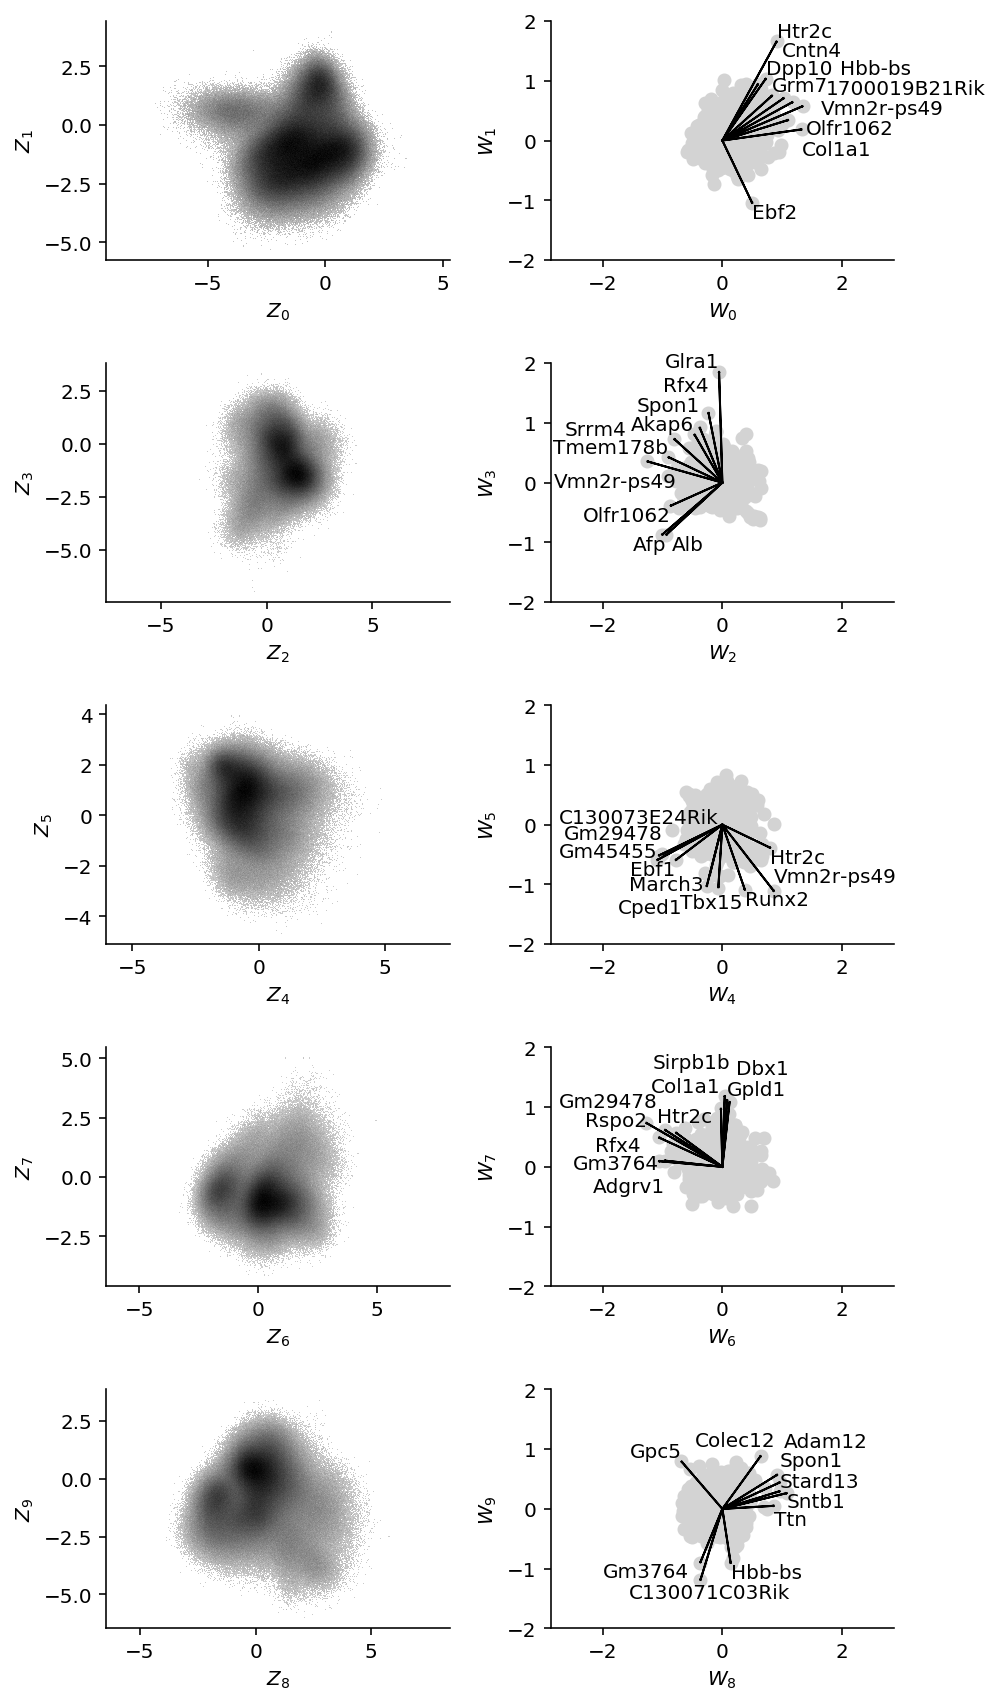

In [243]:
figsize(7, 12)
for i in range(5):
    
    # -- Z plot --
    
    plt.subplot(5, 2, 2 * i + 1)
    
    plt.hist2d(
        Z_df[f'z{2 * i}'], Z_df[f'z{2 * i + 1}'],
        bins=256,
        norm=mcolors.PowerNorm(0.25),
        cmap=cm.gray_r,
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$Z_{2 * i}$')
    plt.ylabel(f'$Z_{2 * i + 1}$')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # -- W plot --
    
    plt.subplot(5, 2, 2 * i + 2)
    
    w_columns = [f'w{2 * i}', f'w{2 * i + 1}']
    
    plt.scatter(
        W_df[w_columns[0]], W_df[w_columns[1]],
        c='lightgrey',
        rasterized=True
    )
    plt.axis('equal');
    plt.xlabel(f'$W_{2 * i}$')
    plt.ylabel(f'$W_{2 * i + 1}$')
    
    tmp_ = W_df.copy()
    tmp_['lnth'] = np.linalg.norm(tmp_[w_columns], axis=1)
    
    ggg = (
        tmp_
        .sort_values('lnth', ascending=False)
        .head(10)[['gene_name', 'lnth', *w_columns]]
    )
    
    texts = []
    arrows = []
    for g, r in ggg.iterrows():
        x_, y_ = r[w_columns[0]], r[w_columns[1]]
        
        ha = 'right'
        if x_ > 0:
            ha = 'left'
            
        va = 'top'
        if y_ > 0:
            va = 'bottom'
            
        arrows.append(plt.arrow(0, 0, x_, y_, length_includes_head=True))
        
        xs, ys = 0, 0
        if (i, r.gene_name) in text_shift:
            xs, ys = text_shift[(i, r.gene_name)]
        
        texts.append(plt.text(x_ + xs, y_ + ys, r.gene_name, ha=ha, va=va))

    plt.xlim(left=-4, right=4)
    plt.ylim(bottom=-2, top=2)
        
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()

plt.savefig('figures/linear_cao_results.pdf', bbox_inches='tight', dpi=400)

In [110]:
hist_df = pd.read_csv('cao_full_training_hist.csv', index_col=0)

In [133]:
hist_df

,vae_ll_train_set,vae_ll_test_set,ldvae_ll_train_set,ldvae_ll_test_set
0,2703.818509,2702.028016,2679.306747,2677.942917
1,603.161839,603.074725,611.583232,611.419042
2,602.447401,602.374094,611.291368,611.121594
3,600.608416,600.548663,611.497087,611.327316


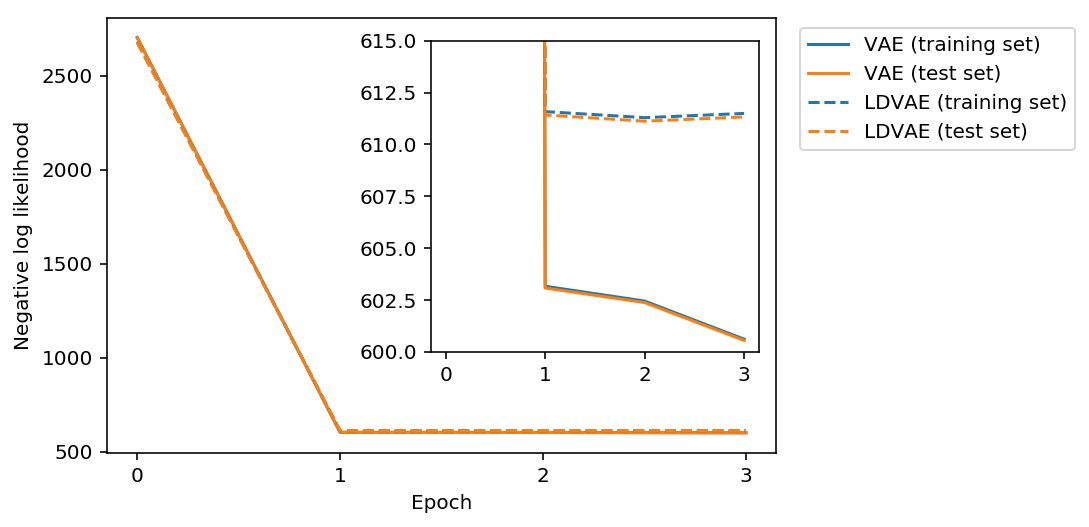

In [161]:
figsize(6, 4)

fig, ax1 = plt.subplots()

ax1.plot(hist_df['vae_ll_train_set'], c='C0', label='VAE (training set)')
ax1.plot(hist_df['vae_ll_test_set'], c='C1', label='VAE (test set)')
ax1.plot(hist_df['ldvae_ll_train_set'], c='C0', ls='--', label='LDVAE (training set)')
ax1.plot(hist_df['ldvae_ll_test_set'], c='C1', ls='--', label='LDVAE (test set)')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Negative log likelihood')

plt.xticks([0, 1, 2, 3]);

ax2 = fig.add_axes([0.5, 0.3, 0.38, 0.54])

ax2.plot(hist_df['vae_ll_train_set'], c='C0', label=None)
ax2.plot(hist_df['vae_ll_test_set'], c='C1', label=None)
ax2.plot(hist_df['ldvae_ll_train_set'], c='C0', ls='--', label=None)
ax2.plot(hist_df['ldvae_ll_test_set'], c='C1', ls='--', label=None)

plt.ylim(bottom=600, top=615)
plt.xticks([0, 1, 2, 3]);

ax1.legend(bbox_to_anchor=(1.02, 1.), loc=2);

plt.savefig('figures/cao_full_training_comparison.pdf', bbox_inches='tight', dpi=200)